## Начало лабораторной

Выгрузка данных из csv файла в датафрейм

In [27]:
import pandas as pd
df = pd.read_csv(".//static//csv//StarbucksDataset.csv")
print(df.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


#### Гистограмма числа продаж кофе за год за весь период времени
Эта гистограмма показывает изменение объемов продаж Starbucks по годам, а также динамику средней цены закрытия акций компании за те же годы. Сравнение объемов продаж и средней цены закрытия может дать понимание рыночной динамики. Например, если объемы продаж растут, а средняя цена закрытия акций также увеличивается, это свидетельствует о положительном восприятии инвесторов.

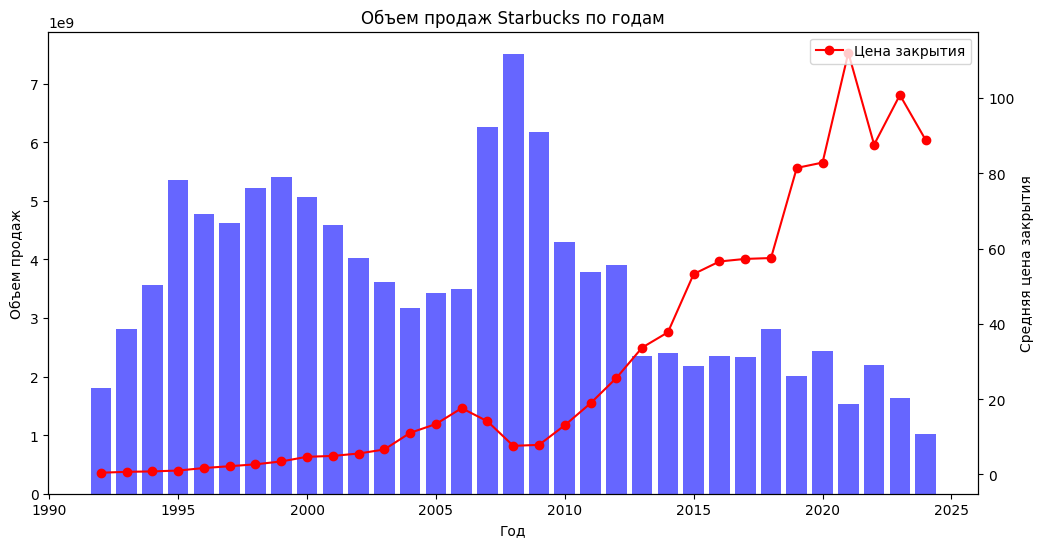

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Чтение данных из CSV файла
df = pd.read_csv(".//static//csv//StarbucksDataset.csv")

# Преобразование столбца 'Date' в формат datetime
df['Date'] = pd.to_datetime(df['Date'])

# Выделение года из даты
df['Year'] = df['Date'].dt.year

# Группировка по годам: получение суммы объема и средней цены закрытия
yearly_data = df.groupby('Year').agg({'Volume': 'sum', 'Close': 'mean'}).reset_index()

# Построение гистограммы
plt.figure(figsize=(12, 6))

# Гистограмма объемов продаж
plt.bar(yearly_data['Year'], yearly_data['Volume'], alpha=0.6, color='b', label='Объем продаж')
plt.ylabel('Объем продаж')
plt.xlabel('Год')
plt.title('Объем продаж Starbucks по годам')

# Вторая ось для отображения средней цены закрытия
ax2 = plt.gca().twinx()
ax2.plot(yearly_data['Year'], yearly_data['Close'], color='r', marker='o', label='Цена закрытия')
ax2.set_ylabel('Средняя цена закрытия')

# Добавление легенды
plt.legend(loc='upper left')
ax2.legend(loc='upper right')

# Отображение графика
plt.show()

#### Динамика объемов продаж Starbucks по годам

Данный график отображает динамику объемов продаж, что позволяет сделать вывод о том, что на момент 2008 года объем продаж рос наиболее максимально. Сейчас же объем продаж почти на нуле.

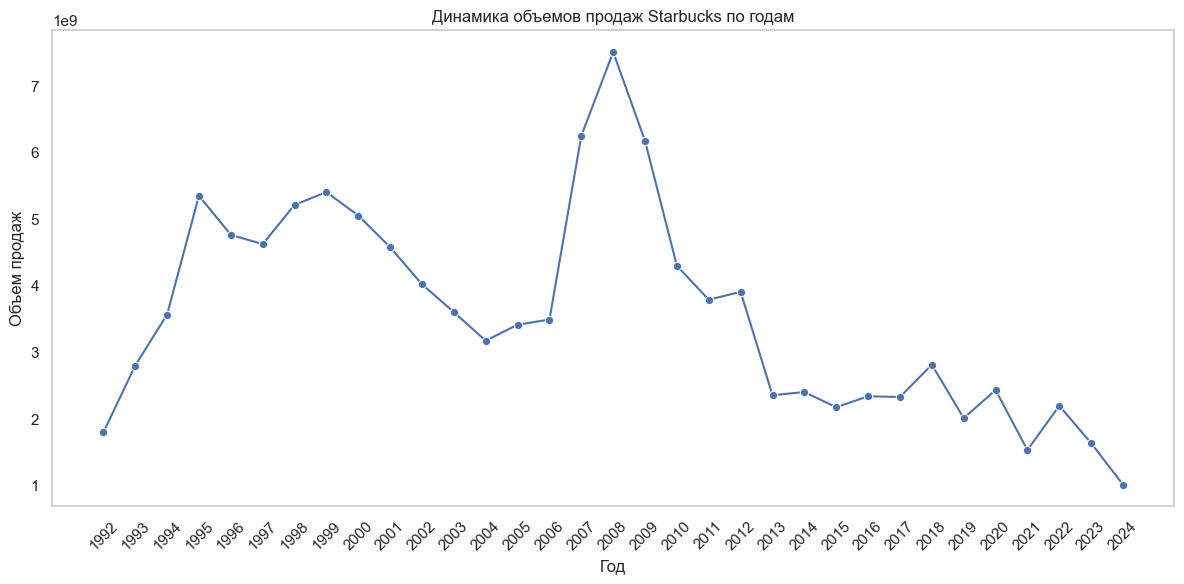

In [37]:


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных
df = pd.read_csv(".//static//csv//StarbucksDataset.csv")

# Преобразование даты в формат datetime
df['Date'] = pd.to_datetime(df['Date'])

# Добавление колонки с годом
df['Year'] = df['Date'].dt.year

# Группировка данных по годам и суммирование объемов
yearly_volume = df.groupby('Year')['Volume'].sum().reset_index()

# Настройка стиля графика
sns.set(style="whitegrid")

# Построение графика
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_volume, x='Year', y='Volume', marker='o')
plt.title('Динамика объемов продаж Starbucks по годам')
plt.xlabel('Год')
plt.ylabel('Объем продаж')
plt.xticks(yearly_volume['Year'], rotation=45)
plt.grid()

# Показать график
plt.tight_layout()
plt.show()

#### Круговая диаграмма среднего объема продаж за последние 10 лет.

График показывает, что наибольший средний объем продаж был в 2018 году. 

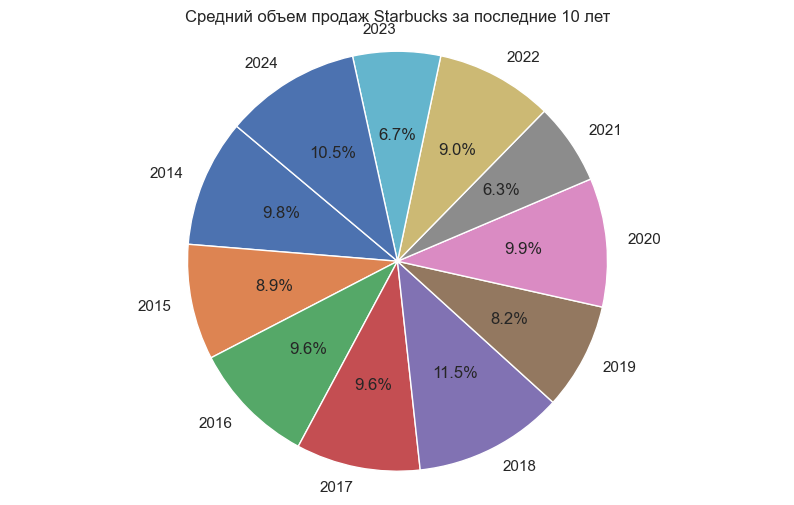

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка датасета
df = pd.read_csv(".//static//csv//StarbucksDataset.csv")

# Убедитесь, что столбец 'Date' распознается как дата
df['Date'] = pd.to_datetime(df['Date'])

# Извлекаем год из даты
df['Year'] = df['Date'].dt.year

# Фильтрация для последних 10 лет
current_year = df['Year'].max()
last_10_years = df[df['Year'] >= (current_year - 10)]

# Группировка данных по годам и расчет среднего объема
average_volume_by_year = last_10_years.groupby('Year')['Volume'].mean()

# Построение круговой диаграммы
plt.figure(figsize=(10, 6))
plt.pie(average_volume_by_year, labels=average_volume_by_year.index, autopct='%1.1f%%', startangle=140)
plt.title('Средний объем продаж Starbucks за последние 10 лет')
plt.axis('equal')  # Чтобы круговая диаграмма была кругом
plt.show()